# Airbnb San Francisco EDA

This notebook explores Airbnb's San Francisco cleaned "listings" dataset.
Focus areas:
- Price patterns
- Neighborhood differences
- Room types and capacity
- Host behavior and experience
- Review scores and listing quality
- Amenities and value

Goal: uncover meaningful insights that could guide business or host decisions.

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# load cleaned dataset
df = pd.read_csv('/Users/mohammedzareef-mustafa/Downloads/Tech Career/Tech Projects/Projects/airbnb-sf-eda/data/clean/listings_clean.csv')

df.head()

,id,scrape_id,last_scraped,source,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_per_person,host_tenure_days,rating_pct,amenities_count
0,958,20250901181253,2025-09-01,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,1169,Holly,2008-07-31,"San Francisco, CA",We are a family of four that live upstairs. W...,within an hour,100.0,100.0,True,Duboce Triangle,1.0,1.0,"['email', 'phone']",True,True,Neighborhood highlights,Western Addition,37.77028,-122.43317,Entire serviced apartment,Entire home/apt,3,1.0,1 bath,1.0,2.0,"[""Clothing storage: closet and dresser"", ""Esse...",157.0,2,30,2.0,2.0,1125.0,1125.0,2.0,1125.0,True,5,9,17,224,2025-09-01,496,41,3,24,50,255,40035.0,2009-07-23,2025-08-16,4.89,4.94,4.93,4.96,4.89,4.98,4.78,STR-0006854,False,1,1,0,0,2.53,52.333333,6241.0,97.8,55
1,5858,20250901181253,2025-09-01,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,8904,Philip Jonathon,2009-03-02,"San Francisco, CA",Philip: English transplant to the Bay Area and...,within a day,70.0,81.0,False,Bernal Heights,2.0,2.0,"['email', 'phone', 'work_email']",True,True,Neighborhood highlights,Bernal Heights,37.74474,-122.42089,Entire rental unit,Entire home/apt,4,2.0,2 baths,2.0,2.0,"[""Carbon monoxide alarm"", ""Shampoo"", ""Hair dry...",250.0,30,90,30.0,30.0,90.0,90.0,30.0,90.0,True,22,52,82,357,2025-09-01,105,0,0,114,0,0,0.0,2009-05-03,2017-08-06,4.87,4.85,4.87,4.89,4.85,4.77,4.68,NaN,False,1,1,0,0,0.53,62.500000,6027.0,97.4,17
2,8014,20250901181253,2025-09-01,city scrape,female HOST quiet fast internet market parking,Room is on the second floor so it gets a good ...,"The neighborhood is very residential, close to...",22402,Jia,2009-06-20,"San Francisco, CA",Airbnbing while we are doing some renovation a...,within an hour,100.0,96.0,True,Sunnyside,3.0,8.0,"['email', 'phone']",True,True,Neighborhood highlights,Outer Mission,37.73077,-122.44827,Private room in home,Private room,1,2.0,2 shared baths,1.0,1.0,"[""Dryer"", ""Essentials"", ""Hangers"", ""Backyard"",...",67.0,4,60,4.0,4.0,60.0,60.0,4.0,60.0,True,0,12,42,42,2025-09-01,90,1,0,42,2,11,737.0,2012-08-03,2025-07-03,4.77,4.74,4.30,4.92,4.94,4.59,4.66,STR-0000974,False,3,0,3,0,0.57,67.000000,5917.0,95.4,31
3,8142,20250901181253,2025-09-01,city scrape,*FriendlyRoom Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",21994,Aaron,2009-06-17,"San Francisco, CA",7 minutes walk to UCSF hospital & school campu...,within a few hours,100.0,86.0,True,Cole Valley,20.0,21.0,"['email', 'phone']",True,True,Neighborhood highlights,Haight Ashbu

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4642 entries, 0 to 4641
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4642 non-null   int64  
 1   scrape_id                                     4642 non-null   int64  
 2   last_scraped                                  4642 non-null   object 
 3   source                                        4642 non-null   object 
 4   name                                          4642 non-null   object 
 5   description                                   4603 non-null   object 
 6   neighborhood_overview                         2984 non-null   object 
 7   host_id                                       4642 non-null   int64  
 8   host_name                                     4641 non-null   object 
 9   host_since                                    4641 non-null   o

In [94]:
df.describe(include='all')

,id,scrape_id,last_scraped,source,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_per_person,host_tenure_days,rating_pct,amenities_count
count,4.642000e+03,4.642000e+03,4642,4642,4642,4603,2984,4.642000e+03,4641,4641,3820,2964,4362,4362.000000,4484.000000,4531,4436,4641.000000,4641.000000,4641,4641,4641,2984,4642,4642.000000,4642.000000,4642,4642,4642.000000,4642.000000,4636,4642.000000,4642.000000,4642,4642.000000,4642.000000,4642.000000,4636.000000,4636.000000,4.636000e+03,4.636000e+03,4642.000000,4.642000e+03,4641,4642.000000,4642.000000,4642.000000,4642.000000,4642,4642.000000,4642.000000,4642.000000,4642.000000,4642.000000,4642.000000,4.642000e+03,4642,4642,4642.000000,4642.000000,4642.000000,4641.000000,4642.000000,4641.000000,4641.000000,3178,4642,4642.000000,4642.000000,4642.000000,4642.000000,4642.000000,4642.000000,4641.000000,4642.000000,4642.000000
unique,NaN,NaN,1,1,4501,4092,2425,NaN,1660,1998,151,1746,4,NaN,NaN,2,203,NaN,NaN,5,2,2,1,36,NaN,NaN,48,4,NaN,NaN,26,NaN,NaN,4363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2613,835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1885,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2025-09-01,city scrape,Chic King Suite at Wyndham Donatello in SF,Escape to a tranquil retreat in the heart of S...,"• CW Canterbury is located in San Francisco, CA.",NaN,Michael,2023-10-16,"San Francisco, CA","We’re Blueground, a global proptech company wi...",within an hour,NaN,NaN,True,Mission District,NaN,NaN,"['email', 'phone']",True,True,Neighborhood highlights,Downtown/Civic Center,NaN,NaN,Entire rental unit,Entire home/apt,NaN,NaN,1 bath,NaN,NaN,"[""Dedicated workspace"", ""Essentials"", ""Hangers...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2025-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-09-30,2025-08-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exempt,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4642,4642,24,24,28,NaN,72,47,3233,41,3175,NaN,NaN,2487,298,NaN,NaN,3661,4597,4148,2984,455,NaN,NaN,1207,3078,NaN,NaN,2250,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4641,NaN,NaN,NaN,NaN,4642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,501,3484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.353486e+17,2.025090e+13,NaN,NaN,NaN,NaN,NaN,1.569157e+08,NaN,NaN,NaN,NaN,NaN,96.848235,86.275201,NaN,NaN,120.381383,150.324068,NaN,NaN,NaN,NaN,NaN,37.767010,-122.433186,NaN,NaN,3.254847,1.298686,NaN,1.413830,1.817320,NaN,297.544593,16.599095,566.973718,16.087791,19.764452,6.022606e+06,6.022626e+06,16.871930,6.014832e+06,NaN,10.175140,25.321413,44.805472,213.868591,NaN,79.853296,13.450668,1.286084,66.329384,11.900474,125.672124,2.676776e+04,NaN,NaN,4.804806,4.825730,4.789302,4.895253,4.877335,4.793471,4.687791,NaN,NaN,11.462516,5.877424,5.440974,0.031452,1.42629

## Key Questions to Explore

1. What does the price distribution look like across San Francisco?
2. How do prices vary by:
   - room type
   - property type
   - neighborhood
3. How do listing qualities (ratings, number of reviews) relate to price?
4. Which neighborhoods have the highest-rated listings?
5. How do host attributes (superhost status, host tenure) influence performance?
6. Do listings with more amenities charge higher prices?

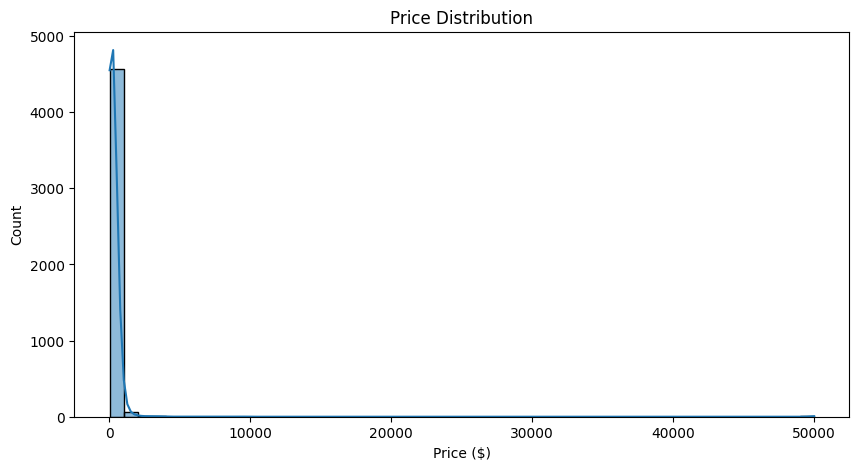

In [95]:
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show()

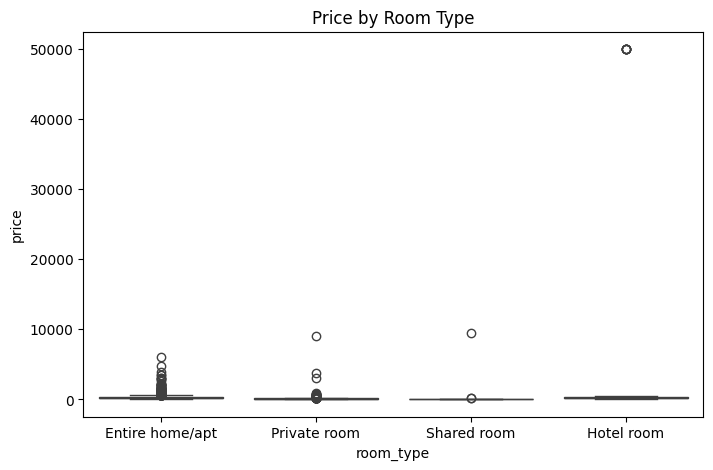

In [96]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='room_type', y='price')
plt.title('Price by Room Type')
plt.show()

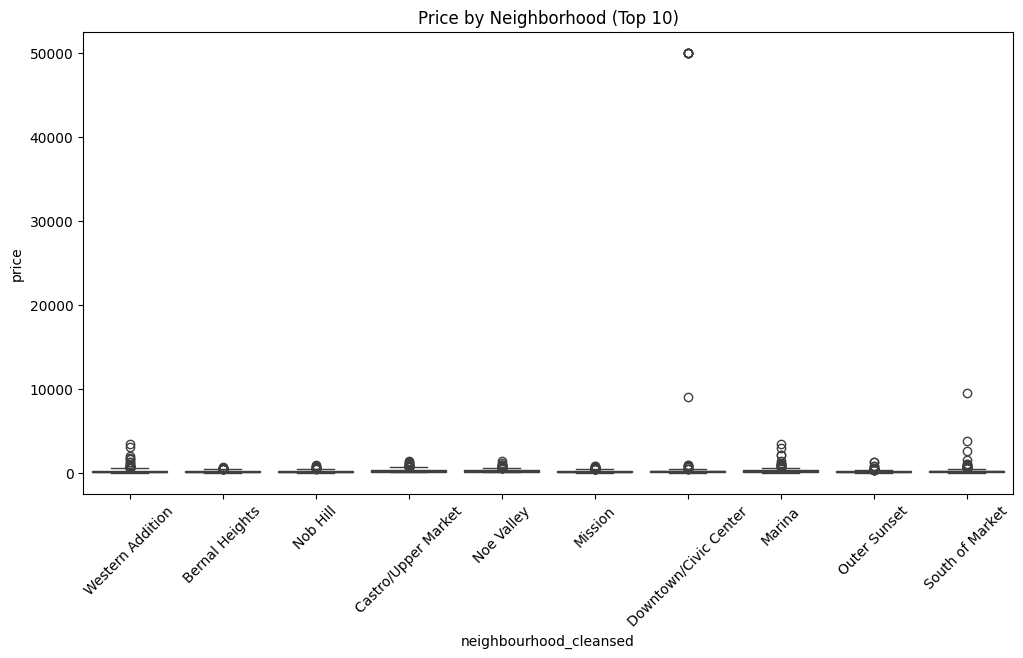

In [97]:
top_neigh = df['neighbourhood_cleansed'].value_counts().head(10).index

plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['neighbourhood_cleansed'].isin(top_neigh)],
            x='neighbourhood_cleansed', y='price')
plt.xticks(rotation=45)
plt.title('Price by Neighborhood (Top 10)')
plt.show()

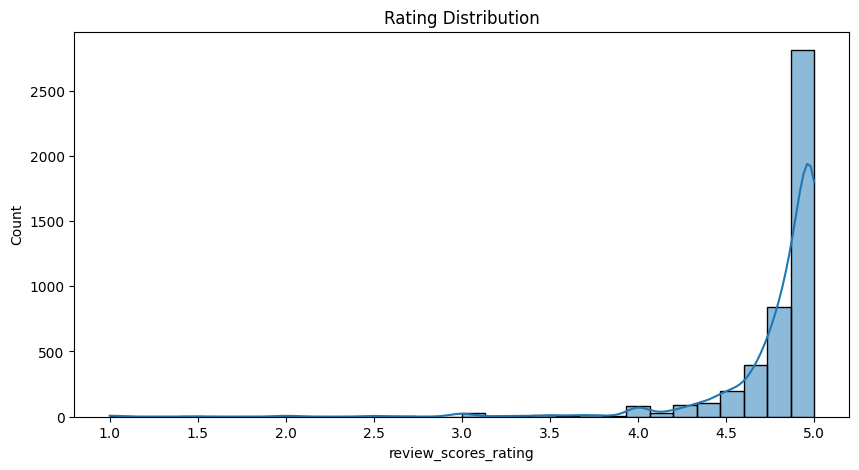

In [98]:
plt.figure(figsize=(10,5))
sns.histplot(df['review_scores_rating'], bins=30, kde=True)
plt.title('Rating Distribution')
plt.show()

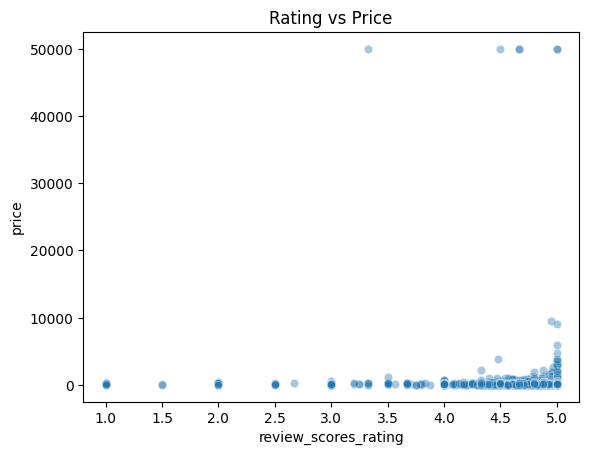

In [99]:
sns.scatterplot(data=df, x='review_scores_rating', y='price', alpha=0.4)
plt.title('Rating vs Price')
plt.show()

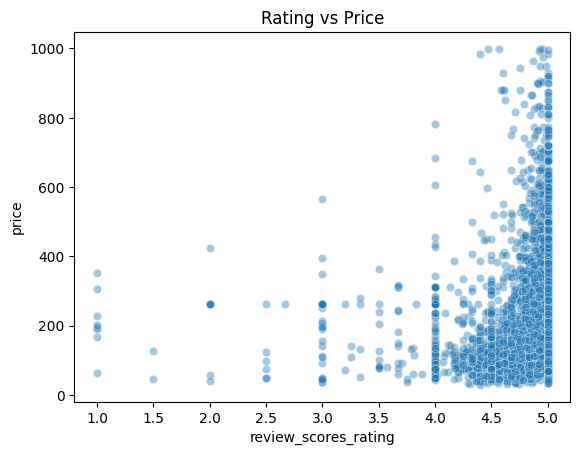

In [100]:
# zoomed in version of previous plot, only displaying prices between 0 and 1,000
sns.scatterplot(data=df[df['price'] < 1000], x='review_scores_rating', y='price', alpha=0.4)
plt.title('Rating vs Price')
plt.show()

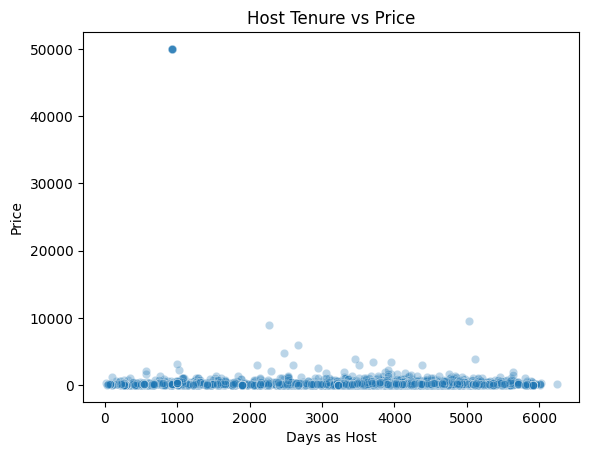

In [101]:
sns.scatterplot(data=df, x='host_tenure_days', y='price', alpha=0.3)
plt.title('Host Tenure vs Price')
plt.xlabel('Days as Host')
plt.ylabel('Price')
plt.show()

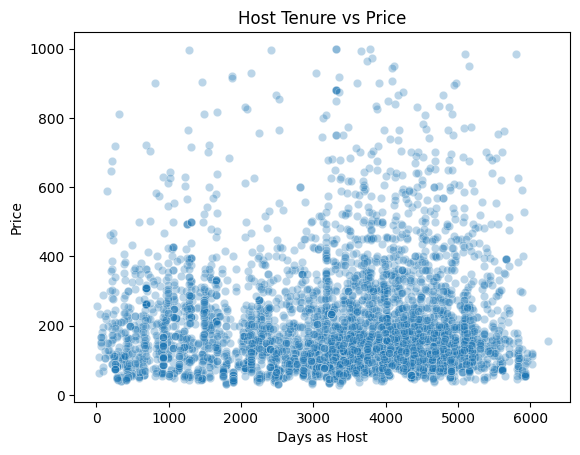

In [102]:
# zoomed in version of previous plot, only displaying prices between 0 and 1,000
sns.scatterplot(data=df[df['price'] < 1000], x='host_tenure_days', y='price', alpha=0.3)
plt.title('Host Tenure vs Price')
plt.xlabel('Days as Host')
plt.ylabel('Price')
plt.show()

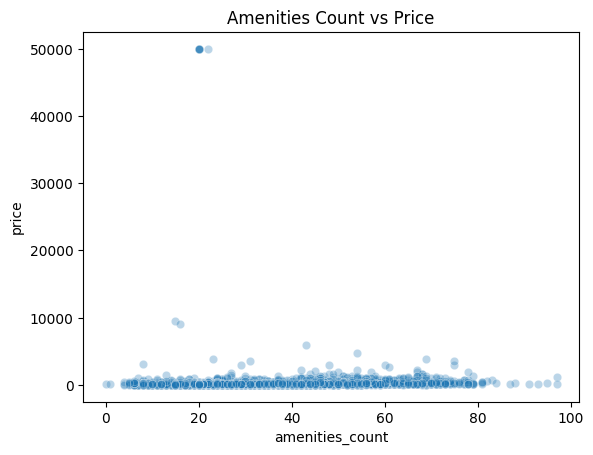

In [103]:
sns.scatterplot(data=df, x='amenities_count', y='price', alpha=0.3)
plt.title('Amenities Count vs Price')
plt.show()

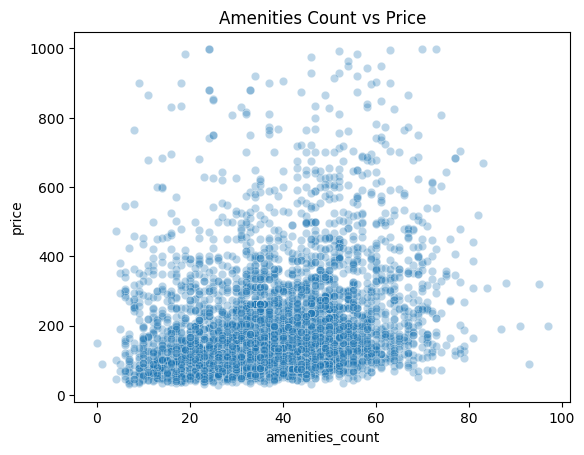

In [104]:
# zoomed in version of previous plot, only displaying prices between 0 and 1,000
sns.scatterplot(data=df[df['price'] < 1000], x='amenities_count', y='price', alpha=0.3)
plt.title('Amenities Count vs Price')
plt.show()

In [105]:
df.groupby('amenities_count')['price'].median().head(20)

amenities_count
0     150.0
1      90.0
4     100.0
5     242.0
6     156.0
7      99.0
8     251.0
9      95.0
10    132.5
11    127.0
12    116.5
13     99.0
14    130.0
15     99.0
16    134.0
17    133.0
18     98.0
19    124.5
20    139.0
21    120.0
Name: price, dtype: float64

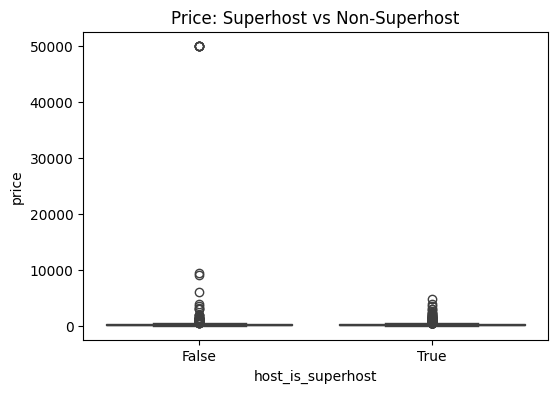

In [106]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='host_is_superhost', y='price')
plt.title('Price: Superhost vs Non-Superhost')
plt.show()

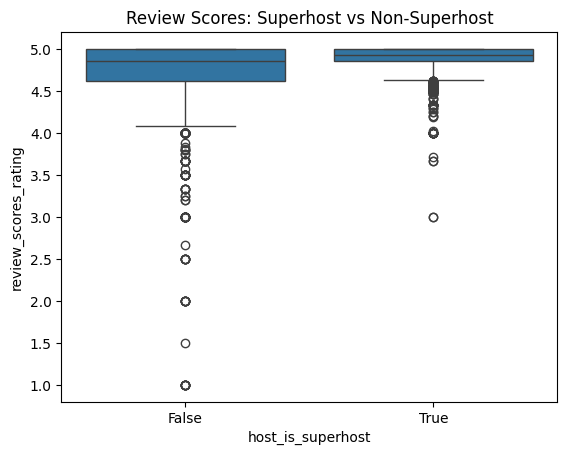

In [107]:
sns.boxplot(data=df, x='host_is_superhost', y='review_scores_rating')
plt.title('Review Scores: Superhost vs Non-Superhost')
plt.show()

## Insights & Key Findings
1. Pricing Patterns
    - Airbnb prices in San Francisco are highly skewed, with most listings clustered below $300 and a small number of luxury listings driving the long tail.
    - Entire homes/apartments consistently command the highest prices on average, while private rooms are significantly more affordable.
    - When controlling for room type, neighborhoods such as Western Addition, Bernal Heights, Cole Valley, and Alamo Square show noticeably higher median prices.
    - Listings with more capacity tend to cost more, but price per person often decreases as accommodates increases, suggesting economies of scale for larger groups.
2. Neighborhood Differences
    - Neighborhoods with the largest number of listings showed meaningful price variation.
    - Some areas (e.g., Western Addition and Bernal Heights) combine high prices with strong review scores, indicating both demand and customer satisfaction.
    - More central or tourist-friendly neighborhoods exhibit higher prices even when ratings are similar to less central ones.
3. Host Behavior & Experience
    - Superhosts tend to charge slightly higher prices, though the difference narrows when adjusting for room type and location.
    - Hosts with longer tenure (years since joining Airbnb) often have more optimized pricing. However, there is no strong linear relationship between host tenure and higher guest ratings.
    - Response and acceptance rates were generally high across the dataset, suggesting competitive host behavior.
4. Review Scores & Listing Quality
    - Ratings are heavily concentrated between 4.5 and 5.0, which is typical for Airbnb.
    - There is no strong direct correlation between rating and price, but higher-priced listings show slightly higher consistency in rating quality.
    - Listings with more reviews tend to be priced closer to the neighborhood median, suggesting that demand helps stabilize pricing over time.
5. Amenities & Perceived Value
    - The number of amenities varies widely, from very minimal offerings to extensive lists.
    - Listings with more amenities generally show higher prices, though the relationship is not perfectly linear.
    - Amenities appear to contribute more to price differentiation within room types, rather than across them.

## Overall Takeaways
- Location, room type, and accommodation size are the strongest drivers of price in San Francisco’s Airbnb market.
- Host status and experience influence pricing, but not as strongly as structural listing features.
- Reviews and ratings show limited impact on price, reinforcing the idea that guests often prioritize location and property type over marginal differences in rating.
- Amenity count provides additional price lift, especially among mid-range listings competing for visibility.

Overall, the analysis shows that structural listing features (especially room type, neighborhood, and amenities) are the strongest price drivers in San Francisco’s Airbnb market.